In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_testresult = pd.read_csv('test_table.csv')
df_testresult.sample(5)

user_id        date source  device browser_language ads_channel  \
377876   290830  2015-12-03    SEO     Web               ES         NaN   
400902   427901  2015-12-04    SEO  Mobile               ES         NaN   
220779   293946  2015-12-03    Ads     Web               ES      Google   
387526   904579  2015-12-04    SEO  Mobile               ES         NaN   
26368    532426  2015-12-04    Ads  Mobile               ES        Bing   

            browser  conversion  test  
377876       Chrome           0     0  
400902  Android_App           0     0  
220779       Chrome           0     1  
387526   Iphone_App           0     0  
26368   Android_App           0     1

In [3]:
df_testresult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null object
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [3]:
df_user = pd.read_csv('user_table.csv')
df_user.sample(5)

user_id sex  age      country
365010   856968   M   29    Venezuela
339697   726162   M   28       Mexico
19385    417400   M   33     Colombia
417136   263348   F   18  El Salvador
261926   303978   M   25    Argentina

In [11]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [4]:
# Check similarity of key parameters in df_testresult and df_user
print(" df_testresult.user_id is unique: ", df_testresult['user_id'].size == df_testresult['user_id'].unique().size )
print(" df_user.user_id is unique: ", df_user['user_id'].size == df_user['user_id'].unique().size )
print(' No df_user.user_id equals df_testresult.user_id : %s and differ no = %d' %(df_testresult['user_id'].unique().size == df_user['user_id'].unique().size,
                                                             df_testresult['user_id'].unique().size - df_user['user_id'].unique().size) )


 df_testresult.user_id is unique:  True
 df_user.user_id is unique:  True
 No df_user.user_id equals df_testresult.user_id : False and differ no = 454


In [5]:
df_model = pd.merge(df_testresult,df_user, how = 'inner', on ='user_id')
df_model.sample(10)

user_id        date  source  device browser_language ads_channel  \
194729   484926  2015-12-04     Ads     Web               ES    Facebook   
53911    710554  2015-12-04     SEO  Mobile               ES         NaN   
399919   396191  2015-12-04     SEO     Web               ES         NaN   
302091   749791  2015-12-01  Direct     Web               ES         NaN   
349578   549840  2015-12-03     SEO  Mobile               ES         NaN   
107056     4050  2015-12-04     Ads  Mobile               ES    Facebook   
255359   901663  2015-12-04     SEO  Mobile               ES         NaN   
72727    223131  2015-12-02     SEO     Web               ES         NaN   
79055    196730  2015-11-30     Ads  Mobile               ES    Facebook   
383487   997980  2015-12-01     SEO     Web               ES         NaN   

            browser  conversion  test sex  age    country  
194729       Chrome           0     0   F   21  Venezuela  
53911   Android_App           0     1   F   26   Colombia  
399919      FireFox           0     0   F   21      Spain  
302091      FireFox           0     0   M   19    Ecuador  
349578  Android_App           0     0   F   35  Guatemala  
107056   Iphone_App           1     0   F   38      Chile  
255359  Android_App           0     1   F   27   Colombia  
72727        Chrome           0     0   F   32     Mexico  
79055    Iphone_App           1     1   F   34     Mexico  
383487           IE           0     0   M   23      Spain

In [17]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452867 entries, 0 to 452866
Data columns (total 12 columns):
user_id             452867 non-null int64
date                452867 non-null object
source              452867 non-null object
device              452867 non-null object
browser_language    452867 non-null object
ads_channel         181693 non-null object
browser             452867 non-null object
conversion          452867 non-null int64
test                452867 non-null int64
sex                 452867 non-null object
age                 452867 non-null int64
country             452867 non-null object
dtypes: int64(4), object(8)
memory usage: 44.9+ MB


In [18]:
df_model.describe()

user_id     conversion           test            age
count   452867.000000  452867.000000  452867.000000  452867.000000
mean    499944.805166       0.049560       0.476462      27.130740
std     288676.264784       0.217034       0.499446       6.776678
min          1.000000       0.000000       0.000000      18.000000
25%     249819.000000       0.000000       0.000000      22.000000
50%     500019.000000       0.000000       0.000000      26.000000
75%     749543.000000       0.000000       1.000000      31.000000
max    1000000.000000       1.000000       1.000000      70.000000

In [8]:
df_model['country'].unique()

array(['Spain', 'Mexico', 'Venezuela', 'Bolivia', 'Colombia', 'Uruguay',
       'El Salvador', 'Nicaragua', 'Peru', 'Costa Rica', 'Chile',
       'Argentina', 'Ecuador', 'Guatemala', 'Honduras', 'Paraguay',
       'Panama'], dtype=object)

In [20]:
df_model['conversion'].size

452867

In [6]:
df_model[['country','test','conversion']].groupby(['country','test']).agg(
    {'conversion': {'mean':'mean','count':'count','no.conversion':'sum'}})

D:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


conversion                     
                       mean  count no.conversion
country     test                                
Argentina   0      0.015071   9356           141
            1      0.013725  37377           513
Bolivia     0      0.049369   5550           274
            1      0.047901   5574           267
Chile       0      0.048107   9853           474
            1      0.051295   9884           507
Colombia    0      0.052089  27088          1411
            1      0.050571  26972          1364
Costa Rica  0      0.052256   2660           139
            1      0.054738   2649           145
Ecuador     0      0.049154   8036           395
            1      0.048988   7859           385
El Salvador 0      0.053554   4108           220
            1      0.047947   4067           195
Guatemala   0      0.050643   7622           386
            1      0.048647   7503           365
Honduras    0      0.050906   4361           222
            1      0.047540   4207           200
Mexico      0      0.049495  64209          3178
            1      0.051186  64275          3290
Nicaragua   0      0.052647   3419           180
            1      0.054177   3304           179
Panama      0      0.046796   1966            92
            1      0.049370   1985            98
Paraguay    0      0.048493   3650           177
            1      0.049229   3697           182
Peru        0      0.049914  16869           842
            1      0.050604  16797           850
Spain       0      0.079719  51782          4128
Uruguay     0      0.012048    415             5
            1      0.012907   3719            48
Venezuela   0      0.050344  16149           813
            1      0.048978  15905           779

In [7]:
# Plotting the statistical data of the n.o conversion in each testing country
import seaborn as sns
print (sns.__version__)
g = sns.catplot(x="country", y="conversion",
                hue='test',
                data=df_model[['country','test','conversion']].groupby(['country','test'], as_index=False).agg(
                    {'conversion': 'sum'})
            , kind="bar",height=8, aspect=1.4 )
g.set_xticklabels(rotation=45)

0.9.0


0.9.0


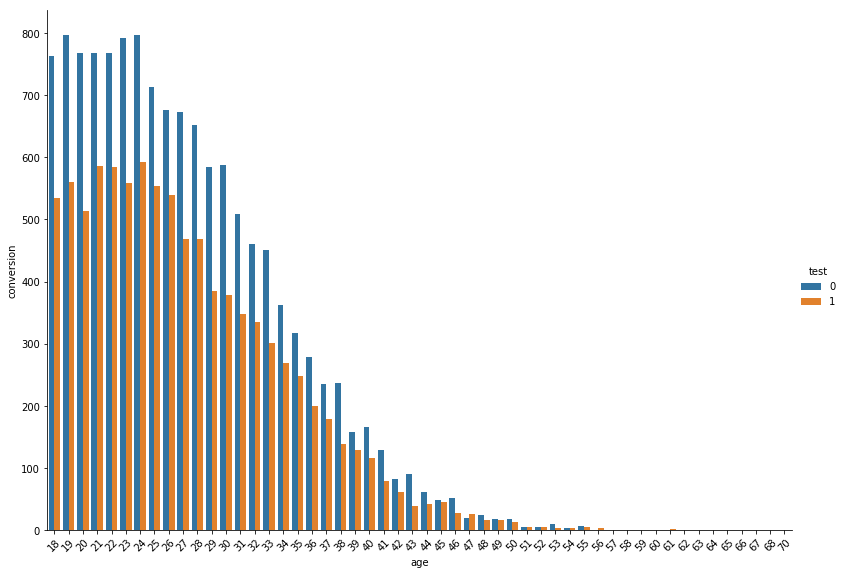

In [8]:
# Another statistical ploting of the n.o of conversion in each testing age
import seaborn as sns
print (sns.__version__)
g = sns.catplot(x="age", y="conversion",
                hue='test',
                data=df_model[['age','test','conversion']].groupby(['age','test'], as_index=False).agg(
                    {'conversion': 'sum'})
            , kind="bar",height=8, aspect=1.4 )
g.set_xticklabels(rotation=45)

In [10]:
df_ttest = df_model[(df_model['country'] != 'Spain')][['test','conversion']]
df_ttest.groupby(['test']).agg(
    {'conversion': {'mean':'mean','count':'count','no.conversion':'sum'}})

D:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


conversion                      
           mean   count no.conversion
test                                 
0      0.048292  185311          8949
1      0.043411  215774          9367

In [11]:
from scipy.stats import ttest_ind
# Do the  Weltch T-test
ttest_ind(df_ttest[df_ttest['test'] == 1]['conversion'],df_ttest[df_ttest['test'] == 0]['conversion'])

Ttest_indResult(statistic=-7.382252163053968, pvalue=1.559329277881674e-13)

In [12]:
# Define Weltch T-test function , two-side test
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import t
# Do the  Weltch T-test
def weltch_ttest(x,y):
  # Calculate the mean difference and 95% confidence interval
  ind_t_test = ttest_ind(x,y)
  mean_x = x.mean()
  mean_y = y.mean()
  diff_mean = abs(mean_x - mean_y)
  
  N1 = x.size
  N2 = y.size
  N = (N1 + N2 - 2)
  std_x = x.std()
  std_y = y.std()
  # average standard deviations between groups
  std_N1N2 = np.sqrt( ((N1 - 1)*(std_x)**2 + (N2 - 1)*(std_y)**2) / N) 
  
  # the margin of error, with t-component which is based on the degrees of 
  # freedom associated with our data, equals the number that corresponds 0.975 in t-distribution of N
  MoE = t.ppf(0.975, N) * std_N1N2 * np.sqrt(1/N1 + 1/N2)
  
  print('The results of the independent t-test are: \n\tt-value = {:4.5f}\n\tp-value = {:4.5f}' .format(ind_t_test[0],ind_t_test[1]))
  print('Sample estimates: \n x-means = {:4.3f}, x-std = {:4.3f}  \n y-means = {:4.3f}, y-std = {:4.3f} ' .format(mean_x,std_x,mean_y,std_y))
  print('Margin of error: {:4.4f}'.format(MoE))
  # calculate the 95% confidence interval of this difference
  print('The difference between groups is {:3.4f} [{:3.4f} to {:3.4f}] (mean [95% CI])\n'.format(
      diff_mean, diff_mean - MoE, diff_mean + MoE))
  return np.array([ind_t_test[0],ind_t_test[1],diff_mean, diff_mean - MoE, diff_mean + MoE])

In [13]:
weltch_ttest(df_ttest[df_ttest['test'] == 1]['conversion'],df_ttest[df_ttest['test'] == 0]['conversion'])

The results of the independent t-test are: 
	t-value = -7.38225
	p-value = 0.00000
Sample estimates: 
 x-means = 0.043, x-std = 0.204  
 y-means = 0.048, y-std = 0.214 
Margin of error: 0.0013
The difference between groups is 0.0049 [0.0036 to 0.0062] (mean [95% CI])



array([-7.38225216e+00,  1.55932928e-13,  4.88062888e-03,  3.58483385e-03,
        6.17642391e-03])

In [14]:
df_model[['country','test','conversion']].groupby(['country'], as_index=False).agg(
                    {'test':{'test=1': lambda x: (x == 1).sum(),'test=0': lambda x: (x == 0).sum(),'total':'count'},
                     'conversion': {'conversion=1': lambda x: (x == 1).sum(),'conversion=0': lambda x: (x == 0).sum()}})

D:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


country   test                  conversion             
                test=1 test=0   total conversion=1 conversion=0
0     Argentina  37377   9356   46733          654        46079
1       Bolivia   5574   5550   11124          541        10583
2         Chile   9884   9853   19737          981        18756
3      Colombia  26972  27088   54060         2775        51285
4    Costa Rica   2649   2660    5309          284         5025
5       Ecuador   7859   8036   15895          780        15115
6   El Salvador   4067   4108    8175          415         7760
7     Guatemala   7503   7622   15125          751        14374
8      Honduras   4207   4361    8568          422         8146
9        Mexico  64275  64209  128484         6468       122016
10    Nicaragua   3304   3419    6723          359         6364
11       Panama   1985   1966    3951          190         3761
12     Paraguay   3697   3650    7347          359         6988
13         Peru  16797  16869   33666         1692        31974
14        Spain      0  51782   51782         4128        47654
15      Uruguay   3719    415    4134           53         4081
16    Venezuela  15905  16149   32054         1592        30462

In [15]:
df_test = pd.concat([df_model[df_model['test']==1][['country','test','conversion']].
                     groupby(['country']).agg({'conversion':{'test=1':sum}}),
df_model[df_model['test']==0][['country','test','conversion']].groupby(['country']).
                     agg({'conversion':{'test=0':sum}})], 1).reset_index().fillna(0)
df_test.columns = df_test.columns.droplevel(0)
df_test.rename(columns={list(df_test)[0]:'country'}, inplace=True)
df_test['total_conversion'] = df_test['test=1'] + df_test['test=0']
df_test['test=1_rate'] = round((df_test['test=1']/df_test['total_conversion'])*100,2)
df_test['diff_rate'] = abs(df_test['test=1']/df_test['total_conversion'] -df_test['test=0']/df_test['total_conversion'])
df_test

D:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


country  test=1  test=0  total_conversion  test=1_rate  diff_rate
0     Argentina   513.0     141             654.0        78.44   0.568807
1       Bolivia   267.0     274             541.0        49.35   0.012939
2         Chile   507.0     474             981.0        51.68   0.033639
3      Colombia  1364.0    1411            2775.0        49.15   0.016937
4    Costa Rica   145.0     139             284.0        51.06   0.021127
5       Ecuador   385.0     395             780.0        49.36   0.012821
6   El Salvador   195.0     220             415.0        46.99   0.060241
7     Guatemala   365.0     386             751.0        48.60   0.027963
8      Honduras   200.0     222             422.0        47.39   0.052133
9        Mexico  3290.0    3178            6468.0        50.87   0.017316
10    Nicaragua   179.0     180             359.0        49.86   0.002786
11       Panama    98.0      92             190.0        51.58   0.031579
12     Paraguay   182.0     177             359.0        50.70   0.013928
13         Peru   850.0     842            1692.0        50.24   0.004728
14        Spain     0.0    4128            4128.0         0.00   1.000000
15      Uruguay    48.0       5              53.0        90.57   0.811321
16    Venezuela   779.0     813            1592.0        48.93   0.021357

In [16]:
df_tree = df_model[df_model['country'] != 'Spain'][['country','test','conversion']]

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

y = df_tree['conversion']
X = df_tree.drop(['conversion'],axis=1).copy()
X = pd.get_dummies(X, prefix=['country'], columns=['country'])
dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, 
            max_depth = None, min_samples_leaf = 5)
dtree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

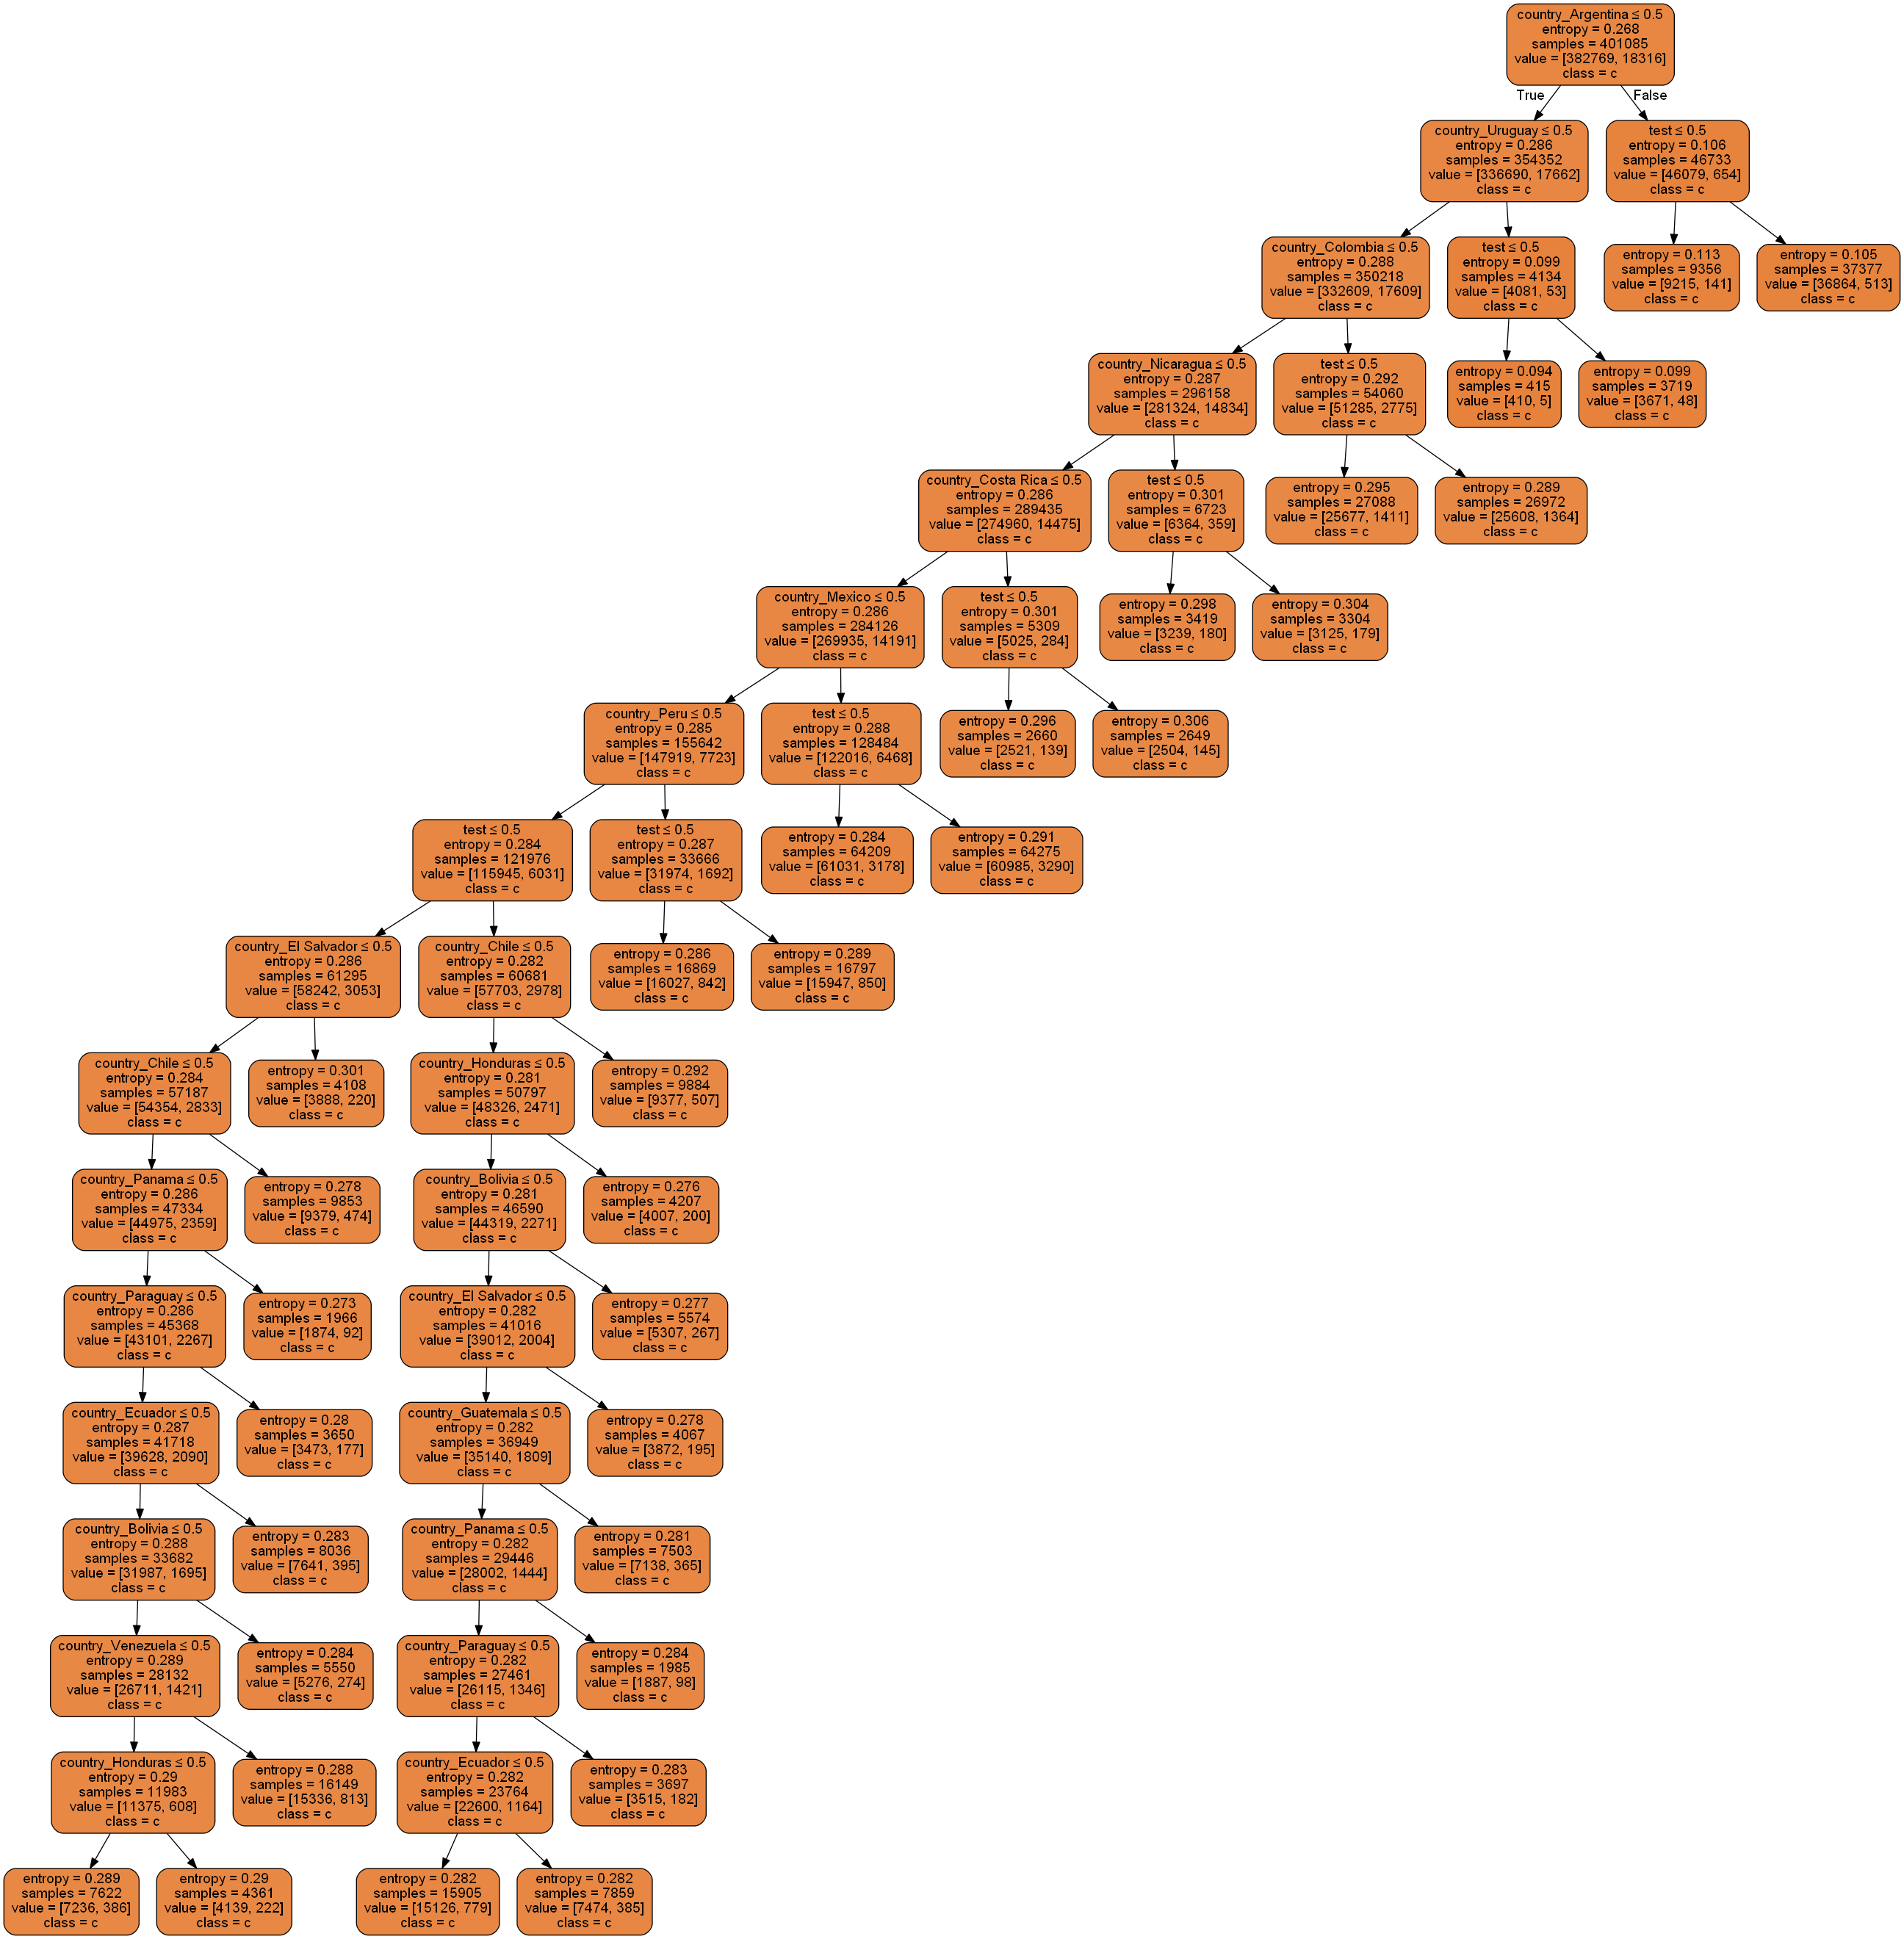

In [18]:
#!pip install pydotplus

import pydotplus
    
# Plotting to see the stucture of Decision Tree, with max_depth = 4
# Create DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y.name,filled=True, rounded=True,
                                special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [19]:
# std = np.std([tree.feature_importances_ for tree in clf_forest.estimators_],axis=0)
features = X.columns
importances = dtree.feature_importances_
nSelectedFeature = 11
indices = np.argsort(importances)[-(nSelectedFeature-1):]

# Print the feature ranking
rank = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(nSelectedFeature):
    print("%d. %s (%f)" % (f + 1, features[rank[f]] , importances[rank[f]]))


# Bar plot
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

Feature ranking:
1. country_Argentina (0.897099)
2. country_Uruguay (0.095033)
3. test (0.002366)
4. country_Chile (0.000983)
5. country_Nicaragua (0.000871)
6. country_Colombia (0.000826)
7. country_El Salvador (0.000762)
8. country_Costa Rica (0.000758)
9. country_Mexico (0.000432)
10. country_Panama (0.000232)
11. country_Peru (0.000207)


Text(0.5,0,'Relative Importance')

In [20]:
df_tree2 = df_model[(df_model['country'] != 'Spain') & (df_model['country'] != 'Argentina') & (df_model['country'] != 'Uruguay')][
    ['country','test','conversion']]

In [21]:
df_tree2.groupby(['test']).agg(
    {'conversion': {'mean':'mean','count':'count','no.conversion':'sum'}})

D:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


conversion                      
           mean   count no.conversion
test                                 
0      0.050148  175540          8803
1      0.050413  174678          8806

Feature ranking:
1. test (0.247880)
2. country_Chile (0.134427)
3. country_Nicaragua (0.119072)
4. country_Colombia (0.112905)
5. country_El Salvador (0.104157)
6. country_Costa Rica (0.103634)
7. country_Mexico (0.059014)
8. country_Panama (0.031689)
9. country_Peru (0.028351)
10. country_Bolivia (0.017232)
11. country_Paraguay (0.014405)


Text(0.5,0,'Relative Importance')

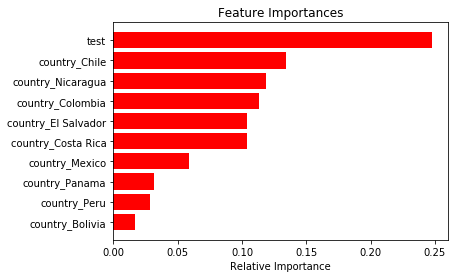

In [22]:
y = df_tree2['conversion']
X = df_tree2.drop(['conversion'],axis=1).copy()
X = pd.get_dummies(X, prefix=['country'], columns=['country'])
dtree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, 
            max_depth = None, min_samples_leaf = 5)
dtree.fit(X,y)

# std = np.std([tree.feature_importances_ for tree in clf_forest.estimators_],axis=0)
features = X.columns
importances = dtree.feature_importances_
nSelectedFeature = 11
indices = np.argsort(importances)[-(nSelectedFeature-1):]

# Print the feature ranking
rank = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(nSelectedFeature):
    print("%d. %s (%f)" % (f + 1, features[rank[f]] , importances[rank[f]]))


# Bar plot
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [24]:
df_test = pd.concat([df_model[df_model['test']==1][['country','test','conversion']].
                     groupby(['country']).agg({'conversion':{'test=1':sum}}),
df_model[df_model['test']==0][['country','test','conversion']].groupby(['country']).
                     agg({'conversion':{'test=0':sum}})], 1).reset_index().fillna(0)
df_test.columns = df_test.columns.droplevel(0)
df_test.rename(columns={list(df_test)[0]:'country'}, inplace=True)
df_test['total_conversion'] = df_test['test=1'] + df_test['test=0']
df_test['ratio'] = np.where(df_test['test=1']>df_test['test=0'],df_test['test=1']/df_test['total_conversion'],
                           df_test['test=0']/df_test['total_conversion'])
#abs(df_test['test=1'] - df_test['test=0'])/df_test['total_conversion']
df_test[df_test['ratio'] >= 0.7]


D:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


country  test=1  test=0  total_conversion     ratio
0   Argentina   513.0     141             654.0  0.784404
14      Spain     0.0    4128            4128.0  1.000000
15    Uruguay    48.0       5              53.0  0.905660

In [26]:
# input target_col, test_col, result_col as column name in str type, e.g 'test'
# input data as pd.Dataframe
# input threshold = x as numeric value
def bias_detection(target_col,test_col,result_col,data,x):  
  df_test = pd.concat([data[data[test_col]==1][[target_col,test_col,result_col]].
                       groupby([target_col]).agg({result_col:{'test=1':sum}}),                   
  data[data[test_col]==0][[target_col,test_col,'conversion']].groupby([target_col]).
                       agg({result_col:{'test=0':sum}})], 1).reset_index().fillna(0)
  
  df_test.columns = df_test.columns.droplevel(0)
  df_test.rename(columns={list(df_test)[0]:target_col}, inplace=True)
  df_test['total_conversion'] = df_test['test=1'] + df_test['test=0']
  df_test['ratio'] = np.where(df_test['test=1']>df_test['test=0'],df_test['test=1']/df_test['total_conversion'],
                           df_test['test=0']/df_test['total_conversion'])
  if df_test[df_test['ratio'] >= x].shape[0] != 0:
    print('False')
    print('>>> Check bias in %s = %s \n' %(target_col,np.array(df_test[df_test['ratio'] >= x][target_col])))
    print('Result table')
    return df_test
  else:
    print('True')
    print('>>> Non-biased cols with threshold {:4.3f} \n' .format(x))
    print('Result table')
    return df_test

In [27]:
# Checking 'country' feature
bias_detection('country','test','conversion',df_model,0.7)

False
>>> Check bias in country = ['Argentina' 'Spain' 'Uruguay'] 

Result table


D:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


country  test=1  test=0  total_conversion     ratio
0     Argentina   513.0     141             654.0  0.784404
1       Bolivia   267.0     274             541.0  0.506470
2         Chile   507.0     474             981.0  0.516820
3      Colombia  1364.0    1411            2775.0  0.508468
4    Costa Rica   145.0     139             284.0  0.510563
5       Ecuador   385.0     395             780.0  0.506410
6   El Salvador   195.0     220             415.0  0.530120
7     Guatemala   365.0     386             751.0  0.513981
8      Honduras   200.0     222             422.0  0.526066
9        Mexico  3290.0    3178            6468.0  0.508658
10    Nicaragua   179.0     180             359.0  0.501393
11       Panama    98.0      92             190.0  0.515789
12     Paraguay   182.0     177             359.0  0.506964
13         Peru   850.0     842            1692.0  0.502364
14        Spain     0.0    4128            4128.0  1.000000
15      Uruguay    48.0       5              53.0  0.905660
16    Venezuela   779.0     813            1592.0  0.510678

In [28]:
# Check function after removing bias variables
df_adjust = df_model[(df_model['country'] != 'Spain') & (df_model['country'] != 'Argentina') & (df_model['country'] != 'Uruguay')][
    ['country','test','conversion']]
bias_detection('country','test','conversion',df_adjust,0.7)

True
>>> Non-biased cols with threshold 0.700 

Result table


D:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


country  test=1  test=0  total_conversion     ratio
0       Bolivia     267     274               541  0.506470
1         Chile     507     474               981  0.516820
2      Colombia    1364    1411              2775  0.508468
3    Costa Rica     145     139               284  0.510563
4       Ecuador     385     395               780  0.506410
5   El Salvador     195     220               415  0.530120
6     Guatemala     365     386               751  0.513981
7      Honduras     200     222               422  0.526066
8        Mexico    3290    3178              6468  0.508658
9     Nicaragua     179     180               359  0.501393
10       Panama      98      92               190  0.515789
11     Paraguay     182     177               359  0.506964
12         Peru     850     842              1692  0.502364
13    Venezuela     779     813              1592  0.510678

In [30]:
bias_detection('browser','test','conversion',df_model,0.7)

True
>>> Non-biased cols with threshold 0.700 

Result table


D:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


browser  test=1  test=0  total_conversion     ratio
0  Android_App    3221    4530              7751  0.584441
1       Chrome    2137    2896              5033  0.575402
2      FireFox     806    1217              2023  0.601582
3           IE    1257    1773              3030  0.585149
4   Iphone_App    1015    1331              2346  0.567349
5        Opera     144     183               327  0.559633
6       Safari     787    1147              1934  0.593071

In [31]:
bias_detection('device','test','conversion',df_model,0.7)

True
>>> Non-biased cols with threshold 0.700 

Result table


D:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


device  test=1  test=0  total_conversion     ratio
0  Mobile    4236    5861             10097  0.580469
1     Web    5131    7216             12347  0.584433

In [32]:
bias_detection('age','test','conversion',df_model,0.7)

False
>>> Check bias in age = [43 53 56 61] 

Result table


D:\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


age  test=1  test=0  total_conversion     ratio
0    18   534.0   763.0            1297.0  0.588281
1    19   561.0   798.0            1359.0  0.587196
2    20   513.0   769.0            1282.0  0.599844
3    21   586.0   768.0            1354.0  0.567208
4    22   585.0   769.0            1354.0  0.567947
5    23   559.0   793.0            1352.0  0.586538
6    24   593.0   797.0            1390.0  0.573381
7    25   554.0   714.0            1268.0  0.563091
8    26   540.0   676.0            1216.0  0.555921
9    27   468.0   673.0            1141.0  0.589833
10   28   468.0   652.0            1120.0  0.582143
11   29   384.0   584.0             968.0  0.603306
12   30   379.0   588.0             967.0  0.608066
13   31   348.0   509.0             857.0  0.593932
14   32   335.0   460.0             795.0  0.578616
15   33   301.0   451.0             752.0  0.599734
16   34   269.0   362.0             631.0  0.573693
17   35   247.0   317.0             564.0  0.562057
18   36   200.0   279.0             479.0  0.582463
19   37   179.0   235.0             414.0  0.567633
20   38   138.0   236.0             374.0  0.631016
21   39   129.0   157.0             286.0  0.548951
22   40   116.0   165.0             281.0  0.587189
23   41    79.0   128.0             207.0  0.618357
24   42    60.0    81.0             141.0  0.574468
25   43    38.0    89.0             127.0  0.700787
26   44    41.0    61.0             102.0  0.598039
27   45    45.0    48.0              93.0  0.516129
28   46    27.0    51.0              78.0  0.653846
29   47    25.0    19.0              44.0  0.568182
30   48    16.0    24.0              40.0  0.600000
31   49    16.0    17.0              33.0  0.515152
32   50    12.0    18.0              30.0  0.600000
33   51     5.0     4.0               9.0  0.555556
34   52     4.0     4.0               8.0  0.500000
35   53     3.0     9.0              12.0  0.750000
36   54     3.0     3.0               6.0  0.500000
37   55     4.0     6.0              10.0  0.600000
38   56     2.0     0.0               2.0  1.000000
39   57     0.0     0.0               0.0       NaN
40   58     0.0     0.0               0.0       NaN
41   59     0.0     0.0               0.0       NaN
42   60     0.0     0.0               0.0       NaN
43   61     1.0     0.0               1.0  1.000000
44   62     0.0     0.0               0.0       NaN
45   63     0.0     0.0               0.0       NaN
46   64     0.0     0.0               0.0       NaN
47   65     0.0     0.0               0.0       NaN
48   66     0.0     0.0               0.0       NaN
49   67     0.0     0.0               0.0       NaN
50   68     0.0     0.0               0.0       NaN
51   70     0.0     0.0               0.0       NaN